# Regresion lineal simple python

In [128]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as snf
import matplotlib.pyplot as plt

In [129]:
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/ads/Advertising.csv"
data = pd.read_csv(url)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [130]:
lm = snf.ols(formula="Sales~TV", data = data).fit()

In [131]:
lm

In [132]:
# b = Intercept = 7.032594 y W=0.047537
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

Asumiendo una relacion lineal
Sales = 7.032594 + 0.047537*TV

In [133]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [134]:
lm.rsquared, lm.rsquared_adj

(0.611875050850071, 0.6099148238341623)

In [135]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.47e-42
Time:                        15:18:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
sales_pred = lm.predict(pd.DataFrame(data['TV']))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
5       7.446162
6       9.765950
7      12.746498
8       7.441409
9      16.530414
10     10.174765
11     17.238710
12      8.163966
13     11.667416
14     16.734822
15     16.321253
16     10.255578
17     20.409404
18     10.322129
19     14.034741
20     17.414596
21     18.317792
22      7.660077
23     17.885209
24      9.994126
25     19.529976
26     13.825579
27     18.446141
28     18.859710
29     10.388680
         ...    
170     9.409426
171    14.852371
172     7.964312
173    15.037764
174    17.604742
175    20.195489
176    18.840695
177    15.123330
178    20.185982
179    14.904661
180    14.476831
181    17.419349
182     9.704153
183    20.704131
184    19.097393
185    16.777605
186    13.663955
187    16.116846
188    20.628073
189     7.921529
190     8.910291
191    10.621610
192     7.850224
193    14.961705
194    14.148829
195     8.848493
196    11.510545
197    15.4465

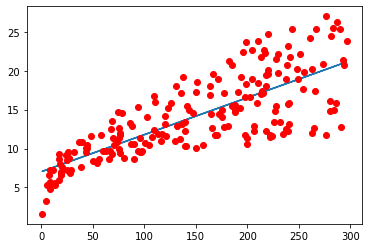

In [137]:
plt.plot(data.TV, sales_pred)
plt.plot(data.TV, data.Sales, 'ro')

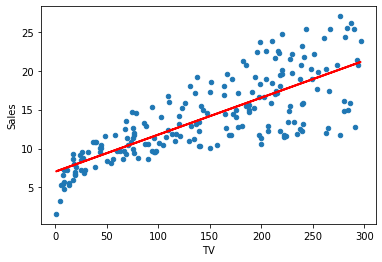

In [138]:
data.plot(kind="scatter", x="TV", y="Sales")
plt.plot(data.TV, sales_pred, c="red", linewidth=2)

In [139]:
data["sales_pred"] = 7.032594+0.047537*data.TV

In [140]:
data["RSE"] = (data["Sales"]-data["sales_pred"])**2

In [141]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [142]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [143]:
sales_m = np.mean(data.Sales)

In [144]:
sales_m

14.022500000000003

In [145]:
error = RSE/sales_m

In [146]:
#23% de los datos que mi modelo no puede explicar
error

0.2323876890168014

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <a list of 10 Patch objects>)

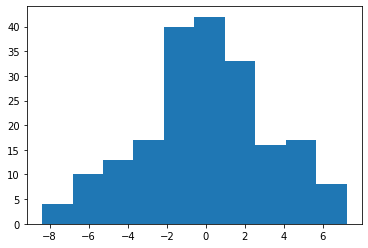

In [147]:
plt.hist(data["Sales"]-data["sales_pred"])

# Regresión lineal múltiple 

In [148]:
lm2 = snf.ols(formula="Sales~TV+Newspaper" ,data=data).fit()

In [149]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

Sales = 5.774948 + 0.046901*TV+ 0.044219*Newspaper

In [150]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [151]:
lm2.rsquared, lm2.rsquared_adj

(0.6458354938293271, 0.6422399150864777)

In [152]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           3.95e-45
Time:                        15:19:05   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
sales_pred = lm.predict(data.loc[:,['TV','Newspaper']])

In [154]:
SSD = sum((data.Sales - sales_pred)**2)

In [155]:
SSD

2102.5305831313517

In [156]:
RSE = np.sqrt(SSD/(len(data)-2-1))

In [157]:
RSE

3.2669166008346298

In [158]:
error = RSE/sales_m

In [159]:
error

0.232976758840052

In [160]:
lm3 = snf.ols(formula = "Sales~TV+Radio",data=data).fit()

In [161]:
lm3.params

Intercept    2.921100
TV           0.045755
Radio        0.187994
dtype: float64

In [162]:
lm3.pvalues

Intercept    4.565557e-19
TV           5.436980e-82
Radio        9.776972e-59
dtype: float64

In [163]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        15:19:07   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [164]:
sales_pred = lm.predict(data.loc[:,['TV','Radio']])
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2-1))

In [165]:
RSE

3.2669166008346298

In [166]:
RSE/sales_m

0.232976758840052

In [167]:
lm4 = snf.ols(formula = "Sales~TV+Newspaper+Radio",data=data).fit()

In [168]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           1.58e-96
Time:                        15:19:08   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Multicolinealidad
* VIF = 1: Las variables no están correlacionadas
* VIF < 5: Las variables tienen una correlación moderada y se pueden quedar en el modelo
* VIF > 5: Las variables están altamente correlacionadas y deben desaparecer del modelo


In [169]:
# Newspaper ~ TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = snf.ols(formula="Newspaper~TV+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1451873787239286

In [170]:
# TV ~ Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = snf.ols(formula="TV~Newspaper+Radio", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.0046107849396502

In [171]:
# Radio ~ TV + Newspaper -> R^2 VIF = 1/(1-R^2)
lm_n = snf.ols(formula="Radio~Newspaper+TV", data = data).fit()
rsquared_n = lm_n.rsquared
VIF = 1/(1-rsquared_n)
VIF

1.1449519171055353

#### Mejor modelo es el lm_3

In [172]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sun, 28 Feb 2021   Prob (F-statistic):           4.83e-98
Time:                        15:19:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""